# Intermediate Visualization with Seaborn

## Chapter 1 - Seaborn Introduction

There are several tools for developing Python visualization, this is a picture of the visualization landscape and where Seaborn fits in.

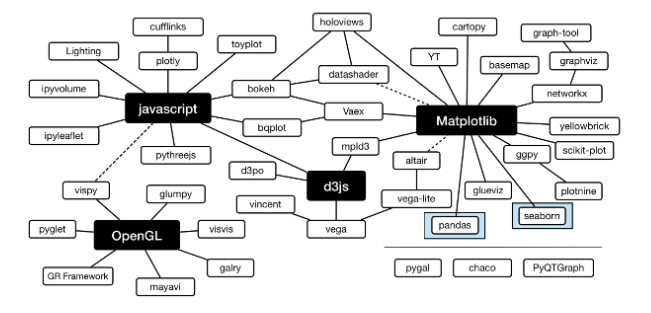

Key point is Matplotlib is a foundational visualization library used by many visualization tools, including Seaborn and it can be used on its own to plot data.

(array([ 37., 515., 323., 257., 232., 119.,  87.,  21.,   7.,   1.]),
 array([ 8.4 ,  9.05,  9.7 , 10.35, 11.  , 11.65, 12.3 , 12.95, 13.6 ,
        14.25, 14.9 ]),
 <a list of 10 Patch objects>)

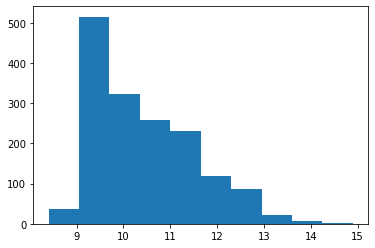

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir('c:\\datacamp\\data\\')

df_wine = pd.read_csv('wine.csv')
fig, ax = plt.subplots()
ax.hist(df_wine['alcohol'])

Pandas, in addition to being a powerful data analysis tool, can also do data visualization. The data visualization of Pandas is useful when you need to quickly view the data already in a DataFrame. 

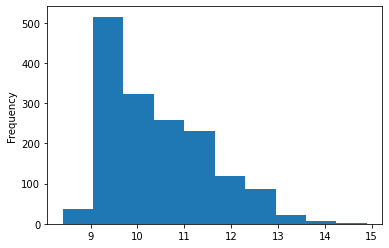

In [12]:
df_wine['alcohol'].plot.hist()

Seaborn integrates with the Python data science landscape by leveraging matplotlib and integrating with Pandas. A Seaborn specific plot would be the Seaborn .distplot() function. It creates a plot similar to a histogram, but generates a Guaussian Kernel Density Estimate (KDE)

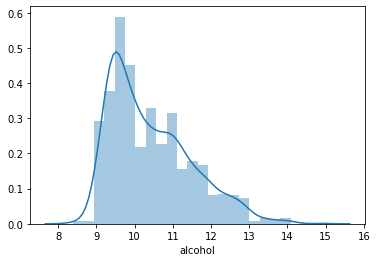

In [13]:
import seaborn as sns
sns.distplot(df_wine['alcohol'])

### Histogram vs Displot

Notice, that by default, Seaborn's .displot() function not only did the analysis, similar to Panda's .plot.hist() function, but also made reasonable assumptions about colors and other visual elements that make the visualization more pleasing. Additionally, Seaborn performed statistical analysis on the data to generate the KDE.


### Exercise 1

#### Reading a csv file

Before you analyze data, you will need to read the data into a pandas DataFrame. In this exercise, you will be looking at data from US School Improvement Grants in 2010. This program gave nearly $4B to schools to help them renovate or improve their programs.

This first step in most data analysis is to import pandas and seaborn and read a data file in order to analyze it further.

__Instructions:__ 
* Import pandas and seaborn using the standard naming conventions.
* The path to the csv file is stored in the grant_file variable.
* Use pandas to read the file.
* Store the resulting DataFrame in the variable df.

In [3]:
# import all modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the DataFrame
df = pd.read_csv('grant_file.csv')

#### Comparing a histogram and distplot

The pandas library supports simple plotting of data, which is very convenient when data is already likely to be in a pandas DataFrame.

Seaborn generally does more statistical analysis on data and can provide more sophisticated insight into the data. In this exercise, we will compare a pandas histogram vs the seaborn distplot.

__Instructions:__
* Use the pandas' plot.hist() function to plot a histogram of the Award_Amount column.
* Use Seaborn's distplot() function to plot a distribution plot of the same column.

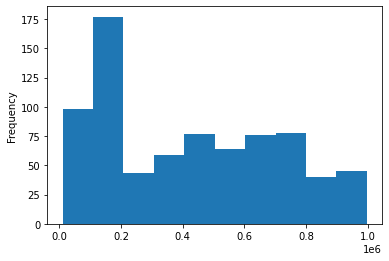

<Figure size 432x288 with 0 Axes>

In [4]:
# Display pandas histogram
df['Award_Amount'].plot.hist()
plt.show()

# Clear out the pandas histogram
plt.clf()

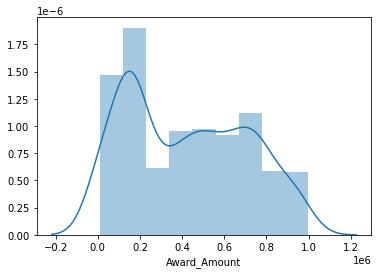

<Figure size 432x288 with 0 Axes>

In [9]:
# Display a Seaborn distplot
sns.distplot(df['Award_Amount'])
plt.show()

# Clear the distplot
plt.clf()

### Using the Distribution Plot

Customizing Seaborn plots is often done with parameters defined during plot creation. Using the Seaborn .distplot() function, the kde line can be disabled by setting the kde= parameter to false and the number of bins the histogram should use can be defined using the bins= keyword. 

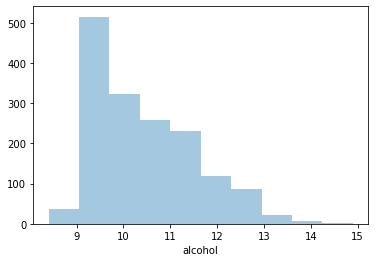

In [14]:
sns.distplot(df_wine['alcohol'], kde=False, bins=10)

#### Alternative Data Distributions

By setting the rug= keyword to True and setting the keyword argument hist= to False provides an alternative view of the distribution of the data can be displayed, delivering the kde curve and rug plot along the x-axis. The value of all of these alternatives is the ability rapidly try different views to determine the view that best visualizes the analysis.

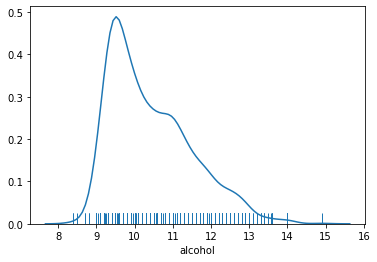

In [15]:
sns.distplot(df_wine['alcohol'], hist=False, rug=True)

#### Further Customizations

Understanding that the rug= and kde= keyword arguments in the Seaborn function .distplot() are based on Seaborn's .kdeplot() and .rugplot() functions allows for further customization of the Seaborn plot by using additional arguments available in the underlying functions. Matplotlib's .kdeplot() function has keyword arguments like kde_kws= that accepts a kde keywords dictionary. 

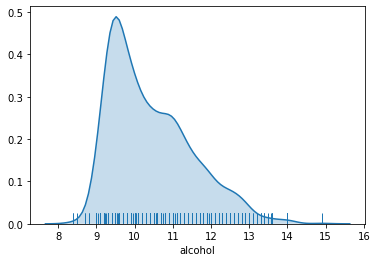

In [17]:
sns.distplot(df_wine['alcohol'], hist=False, rug=True, kde_kws={'shade':True})

### Exercise 2

#### Plot a histogram

The distplot() function will return a Kernel Density Estimate (KDE) by default. The KDE helps to smooth the distribution and is a useful way to look at the data. However, Seaborn can also support the more standard histogram approach if that is more meaningful for your analysis.

__Instructions:__
* Create a distplot for the data and disable the KDE.
* Explicitly pass in the number 20 for the number of bins in the histogram.
* Display the plot using plt.show().

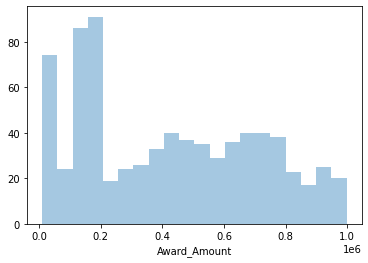

In [18]:
# Create a distplot
sns.distplot(df['Award_Amount'],
             kde=False,
             bins=20)

# Display the plot
plt.show()

#### Rug plot and kde shading

Now that you understand some function arguments for distplot(), we can continue further refining the output. This process of creating a visualization and updating it in an incremental fashion is a useful and common approach to look at data from multiple perspectives.

Seaborn excels at making this process simple.

__Instructions:__
* Create a distplot of the Award_Amount column in the df.
* Configure it to show a shaded kde (using the kde_kws dictionary).
* Add a rug plot above the x axis.
* Display the plot.

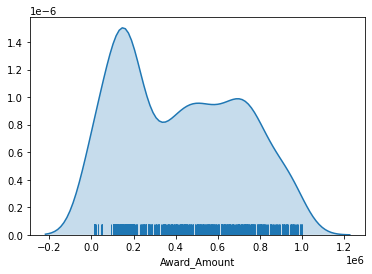

In [19]:
# Create a distplot of the Award Amount
sns.distplot(df['Award_Amount'],
             hist=False,
             rug=True,
             kde_kws={'shade':True})

# Plot the results
plt.show()

### Regression Plots in Seaborn

Histograms and other plots like it are often referred to as univariate analysis because only one variable is being examined. Another common type of plots are regression plots. Regression plots are referred to as bivariate analysis because it visualizes relationships between two variables. Seaborn's .regplot() function is the basis for building a regression plot. The keyword arguments x=, y= and data= are required. The x and y parameters refer to columns since the data source is a Pandas DataFrame.

In the resulting plot, it is evaluating the relationship between a wine's alcohol level and its pH value. The regression line indicates that there is a slight rise in the pH level as the alcohol level increases. 

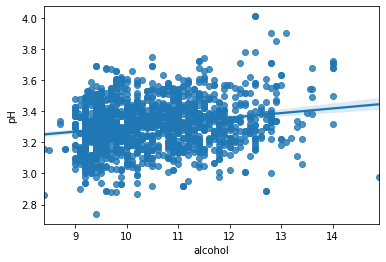

In [22]:
sns.regplot(x='alcohol', y='pH', data=df_wine)

#### lmplot() Builds on Top of the Base regplot()

In much the same way that Seaborn's .kdeplot() is a building block for the more robust .distplot() function, .regplot() is a building block for the Seaborn .lmplot() function. Both .lmplot() and .regplot() are called the same way and display similar plots; however, the lmplot is much more powerful. Both plots below examine the relationship between alcohol content and the quality of the wine and beside the aspect ratio being smaller for the lmplot, the outputs are the same. 

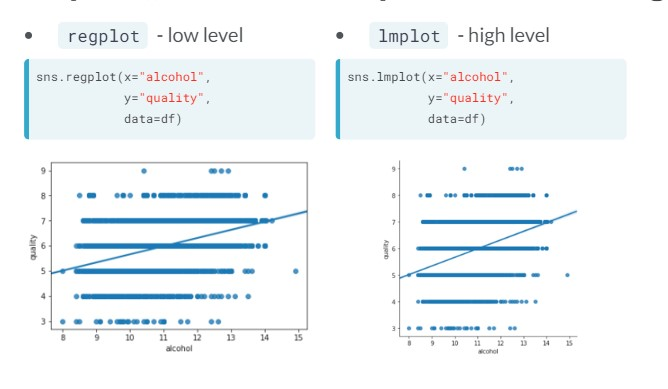

#### lmplot Faceting

Where lmplot becomes more powerful is when parameters like hue= and col= are employed. The use of plotting multiple graphs while changing a single variable is also known as faceting. Faceting can be adding additional information by columns, colors or rows. There are an entire class of Seaborn functions that support faceting.

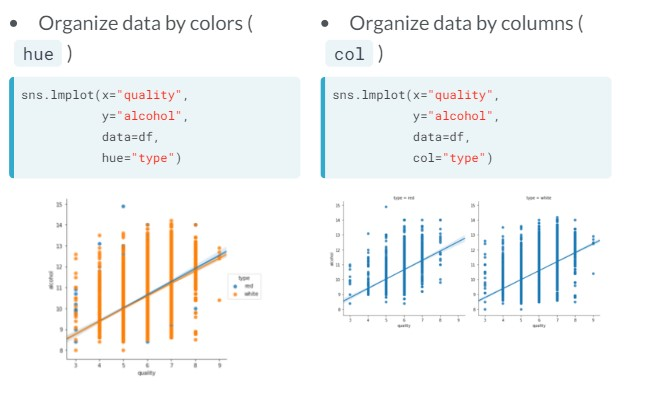

### Exercise 3

#### Create a regression plot

For this set of exercises, we will be looking at FiveThirtyEight's data on which US State has the worst drivers. The data set includes summary level information about fatal accidents as well as insurance premiums for each state as of 2010.

In this exercise, we will look at the difference between the regression plotting functions.

__Instructions:__
* The data is available in the dataframe called df.
* Create a regression plot using regplot() with "insurance_losses" on the x axis and "premiums" on the y axis.
* Create a regression plot of "premiums" versus "insurance_losses" using lmplot().
* Display the plot.

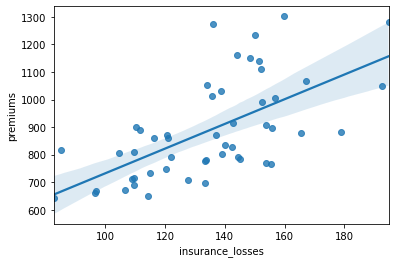

In [5]:
df = pd.read_csv('insurance_premiums.csv')
# Create a regression plot of premiums vs. insurance_losses
sns.regplot(x='insurance_losses', y='premiums', data=df)


# Display the plot
plt.show()

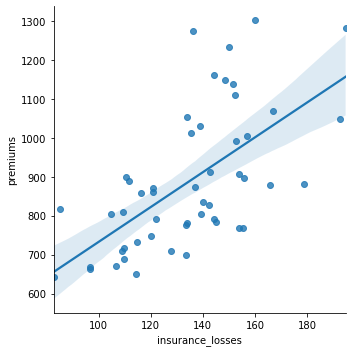

In [27]:
# Create an lmplot of premiums vs. insurance_losses
sns.lmplot(x='insurance_losses', y='premiums', data=df)

# Display the second plot
plt.show()

#### Plotting multiple variables

Since we are using lmplot() now, we can look at the more complex interactions of data. This data set includes geographic information by state and area. It might be interesting to see if there is a difference in relationships based on the Region of the country.

__Instructions:__
* Use lmplot() to look at the relationship between insurance_losses and premiums.
* Plot a regression line for each Region of the country.

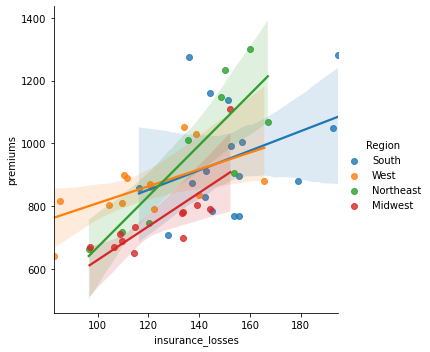

In [29]:
# Create a regression plot using hue
sns.lmplot(data=df, x="insurance_losses", y="premiums", hue="Region")

# Show the results
plt.show()

The results are bit difficult to read. Maybe using multiple lines is not the best approach. Let's try another one in the next exercise.

#### Facetting multiple regressions

lmplot() allows us to facet the data across multiple rows and columns. In the previous plot, the multiple lines were difficult to read in one plot. We can try creating multiple plots by Region to see if that is a more useful visualization.

__Instructions:__
* Use lmplot() to look at the relationship between insurance_losses and premiums.
* Create a plot for each Region of the country.
* Display the plots across multiple rows.

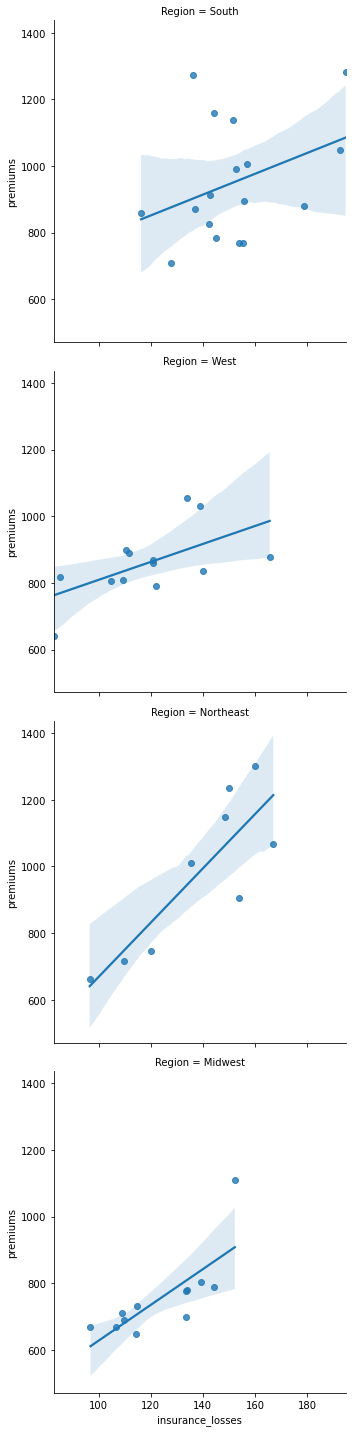

In [31]:
# Create a regression plot with multiple rows
sns.lmplot(data=df,
           x="insurance_losses", y="premiums", row="Region")

# Show the plot
plt.show()